In [1]:
include("../src/network_transmission_workplace.jl")

LoadError: LoadError: [91msyntax: extra token "t_lunch" after end of expression[39m
in expression starting at /Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/src/network_transmission_workplace.jl:50

Define j0scale so that mean infectivity (over 14-day period) is 1

In [2]:
Np = 1000000
sim = init_VL_and_infectiousness(Np, 0.0)

Dict{String,Any} with 11 entries:
  "will_isolate"       => Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, …
  "inf_mag"            => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  … …
  "isolation_time"     => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0…
  "VL_mag"             => [8.18369, 6.39776, 6.95227, 9.66648, 8.5262, 8.05666,…
  "Ntot"               => 1000000
  "asymptomatic"       => Bool[1, 0, 1, 0, 0, 0, 1, 0, 0, 1  …  1, 0, 0, 0, 0, …
  "non_isolators"      => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  999991, 999992, 99…
  "infection_profiles" => [[0.0, 0.0, 0.0, 0.0103897, 0.690223, 1.77096, 1.7634…
  "VL_profiles"        => [[2.63348, 3.63502, 4.63656, 5.6381, 6.63965, 7.64119…
  "symp_day"           => [6.0, 4.0, 5.0, 12.0, 8.0, 3.0, 4.0, 6.0, 5.0, 6.0  ……
  "days_infectious"    => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0…

In [14]:
scale0 = 0.67:0.005:0.74
pscale = zeros(length(scale0),Np)
for (j,b) in enumerate(scale0)
    for i in 1:Np
        pscale[j,i] = sum(sim["infection_profiles"][i] .* b)/10.0
    end
end

4.718999999999999

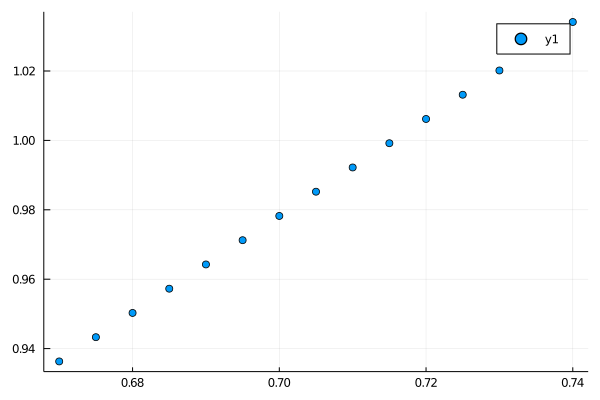

In [16]:
print(0.715*j0scale)
scatter(scale0,mean(pscale,dims=2))

Household SAR calibration

In [23]:
scale = 0.715
bhh = 0.07:0.001:0.08
pinf = zeros(length(bhh),Np)
for (j,b) in enumerate(bhh)
    for i in 1:Np
        pnoinfpd = exp.(-sim["infection_profiles"][i] .* scale * b)
        pinf[j,i] = 1 - prod(pnoinfpd)
    end
end

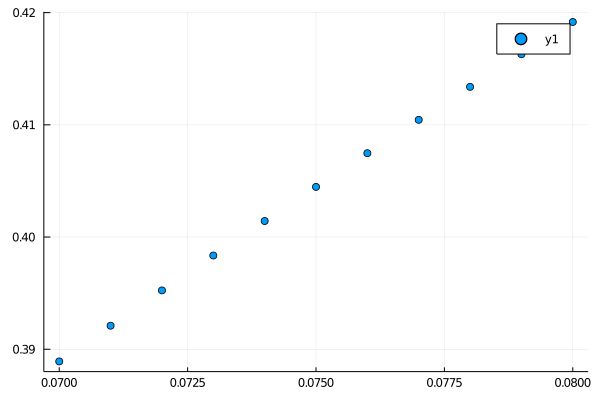

In [24]:
scatter(bhh,mean(pinf,dims=2))

1 hour F2F @ 1m calibration

In [21]:
bscale = 0.06:0.001:0.08
pinff2f = zeros(length(bscale),Np)
for (j,b) in enumerate(bscale)
    for i in 1:Np
        pinfpd = 1 .- exp.(-sim["infection_profiles"][i] .* scale * b)
        pinff2f[j,i] = sum(pinfpd)/10.0
    end
end

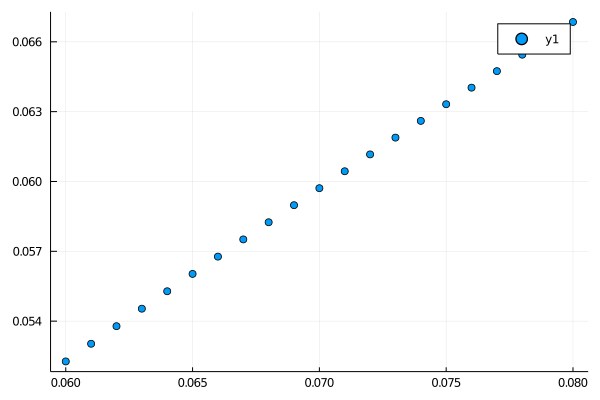

In [22]:
scatter(bscale,mean(pinff2f,dims=2))

0.1300981325384341


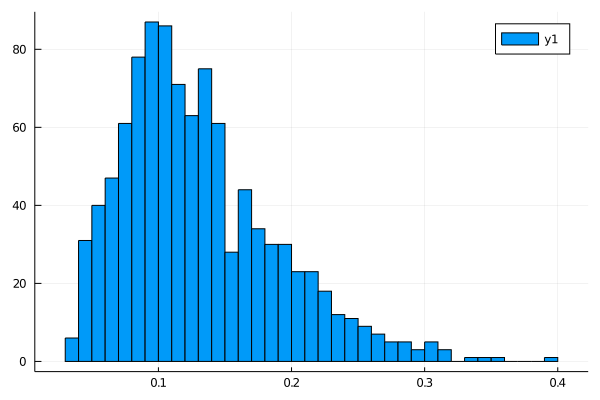

In [142]:
print(mean(1 .- exp.(-y)),'\n')
Plots.histogram(1 .- exp.(-y),bins=50)

In [90]:
cutoff = 10^6
sigma = 0.5
CSI = Array{Array{Float64,1},1}(undef,0)
TP = zeros(length(ips))
FTP = zeros(length(ips))
for i in 1:length(ips)
    t = 0:(length(ips[i])-1)
    CSI1 = cumsum(ips[i] .* exp.(sigma .* t)) .* exp.(-sigma .* t)
    t2 = length(ips[i]):(length(ips[i])+30)
    CSI2 = sum(ips[i] .* exp.(sigma .* t)) .* exp.(-sigma .* t2)
    push!(CSI,vcat(CSI1,CSI2))
    positive = CSI[i] .> cutoff
    nd = 1:length(CSI[i])
    if sum(positive) > 0
        FTP[i] = min(nd[positive .== true]...)
        TP[i] = sum(positive)
    end
end
Plots.plot(TP)
Plots.plot!(FTP)
print(mean(TP[TP .> 0]),'\n')
print(mean(FTP[TP .> 0]))

16.852941176470587
2.588235294117647

In [91]:
ipmean = zeros(1000)
iplength = zeros(1000)
ippresymp = zeros(1000)
for (i, ip) in enumerate(ips)
    ipmean[i] = mean(ip) 
    iplength[i] = length(ip)
    ipmax = max(ip...)
    j = 1
    while ip[j] < ipmax
        j += 1
    end
    ippresymp[i] = j-1
end

In [92]:
Plots.histogram(ipmean)

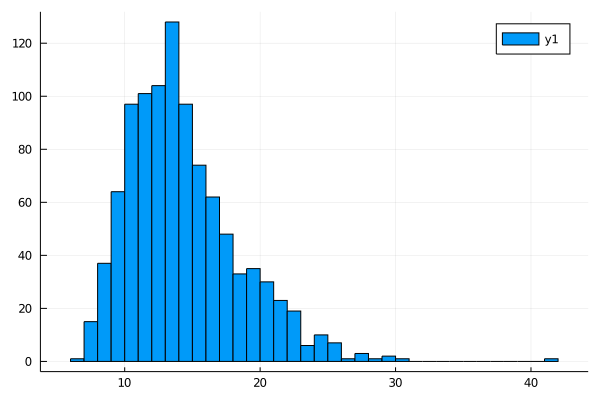

In [21]:
Plots.histogram(iplength)

In [22]:
Plots.p(ippresymp)

LoadError: UndefVarError: p not defined

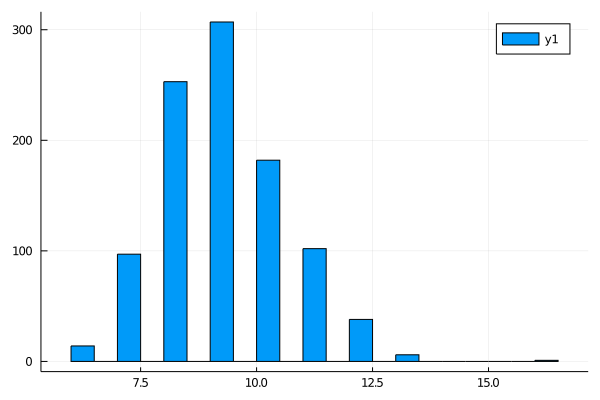

In [23]:
Plots.histogram(iplength .- ippresymp)

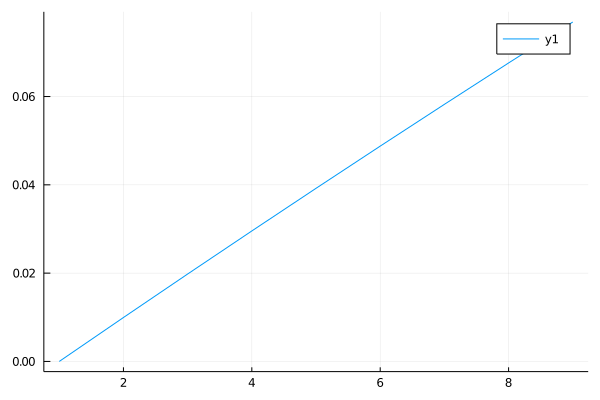

In [24]:
t = [0,1,2,3,4,5,6,7,8]
Plots.plot(1 .- exp.(-0.01*t))

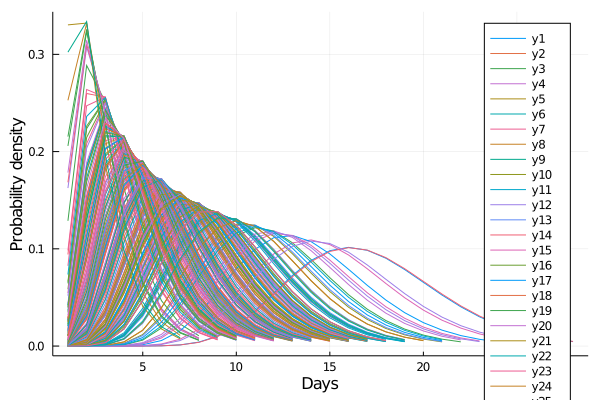

In [26]:
plot_infection_profiles(200,1.0)

#now p is essentially fraction of daily contacts that will be infected over whole period. 
#E.g. R = 1.5 will be NC = 10 and p = 0.15
#

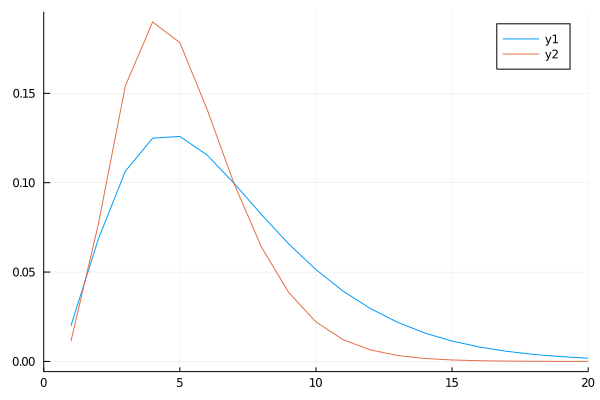

In [40]:
##### meanip = zeros(Int64(max(iplength...)))

for iprof in ips
    meanip[1:length(iprof)] += iprof
end
meanip ./= length(ips)
x = 1:(length(meanip))
Plots.plot(x,meanip,xlim=(0,20))
Plots.plot!(x,pdf.(Gamma(,1.0),x))

1 - e(-b) = p
OR = p/(1-p)
OR = (1-e(-b))/e(-b) = e(b) - 1
b = log(1+OR)